<center>

# Relazione 12

</center>

L'obiettivo dell'esercitazione 12 è utilizzare delle reti neurali per riconoscere e distinguere fra 10 numeri scritti a mano (cifre che vanno da 0 a 9). Per far questo utilizzeremo delle librerie di Keras.

In [8]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [9]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


In [10]:
# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


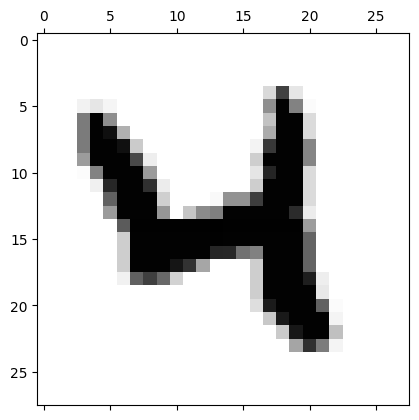

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [11]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [13]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [14]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5


2023-07-13 11:54:43.743064: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1873/1875 [============================>.] - ETA: 0s - loss: 0.7886 - acc: 0.7663

2023-07-13 11:54:53.749664: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 10s 5ms/step - loss: 0.7881 - acc: 0.7665 - val_loss: 0.3241 - val_acc: 0.9119
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3921 - acc: 0.8885 - val_loss: 0.2494 - val_acc: 0.9284
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3174 - acc: 0.9099 - val_loss: 0.2088 - val_acc: 0.9404
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2712 - acc: 0.9232 - val_loss: 0.1813 - val_acc: 0.9458
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2397 - acc: 0.9329 - val_loss: 0.1641 - val_acc: 0.9518


 13/313 [>.............................] - ETA: 1s - loss: 0.1491 - acc: 0.9615

2023-07-13 11:55:28.448499: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 0.1641 - acc: 0.9518

Test loss: 0.1640896052122116
Test accuracy: 0.9517999887466431


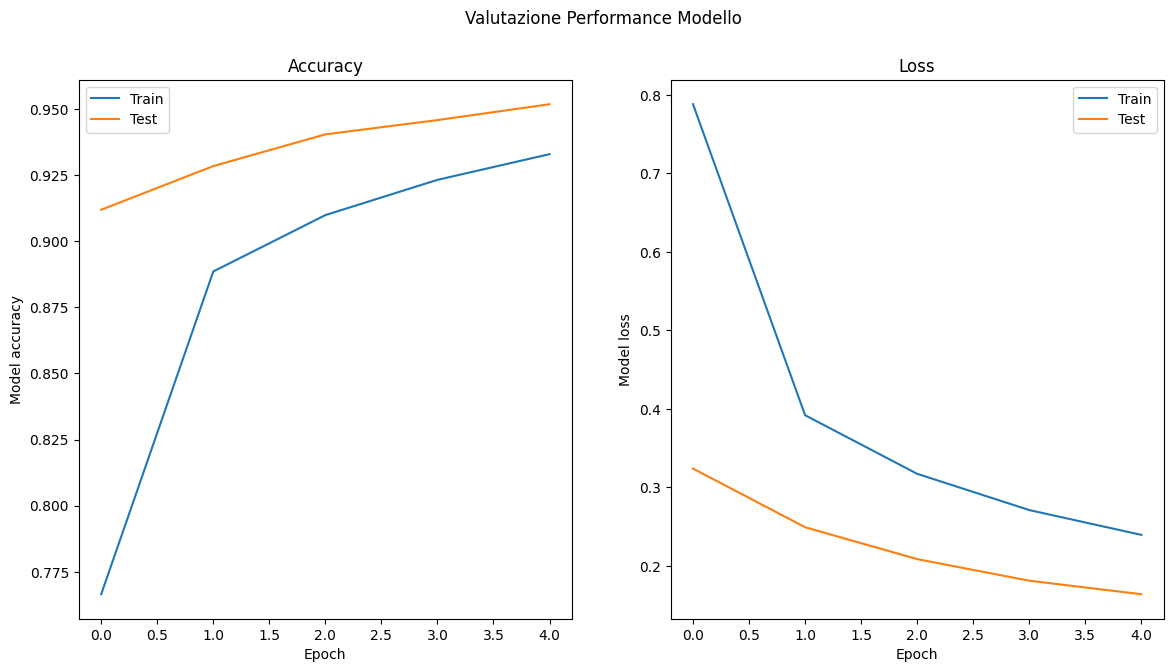

In [15]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
fig, ax = plt.subplots(1,2, figsize = (14, 7))

for i in range(0, 2):
    if i==0:
        # summarize history for accuracy
        ax[i].plot(history.history['acc'])
        ax[i].plot(history.history['val_acc'])
        ax[i].set_ylabel('Model accuracy')
        ax[i].set_title('Accuracy')

    else:
        # summarize history for loss
        ax[i].plot(history.history['loss'])
        ax[i].plot(history.history['val_loss'])
        ax[i].set_ylabel('Model loss')
        ax[i].set_title('Loss')

    ax[i].set_xlabel('Epoch')
    ax[i].legend(['Train', 'Test'], loc='best')

fig.suptitle("Valutazione Performance Modello")
plt.show()

313/313 [==============================] - 1s 2ms/step


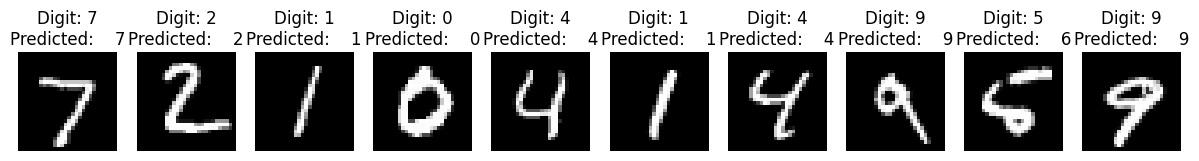

In [16]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

<span style="color: blue;">

## Esercizio 1

</span>

Riporto in seguito quanto trovato andando a testare i vari ottimizzatori: lavoro con un numero di epoche pari a 20 e batches di dimensione pari a 32. In particolare per ogni metodo utilizzato stampo i valori di 'accuracy' e 'loss'. Tutti gli ottimizzatori performano bene:

<center>

##### **SGD**
<center>

$$
\begin{cases}
T_{loss}\,=\,0.07660095393657684 \\
T_{acc}\,=\,0.9764000177383423
\end{cases}
$$

<center>

##### **Adam**
<center>

$$
\begin{cases}
    T_{loss}\,=\,0.11590702831745148 \\
    T_{acc}\,=\,0.9835000038146973
\end{cases}
$$

<center>

##### **RMSprop**
<center>

$$
\begin{cases}
    T_{loss}\,=\,0.245376318693161 \\
    T_{acc}\,=\,0.978600025177002
\end{cases}
$$

<center>

##### **Adagrad**
<center>

$$
\begin{cases}
    T_{loss}\,=\,0.21115896105766296 \\
    T_{acc}\,=\,0.940500020980835
\end{cases}
$$

<center>

##### **Adadelta**
<center>

$$
\begin{cases}
    T_{loss}\,=\,0.5805418491363525 \\
    T_{acc}\,=\,0.8712000250816345
\end{cases}
$$

<center>

##### **Adamax**
<center>

$$
\begin{cases}
    T_{loss}\,=\,0.06334316730499268 \\
    T_{acc}\,=\,0.9828000068664551
\end{cases}
$$

<center>

##### **Nadam**
<center>

$$
\begin{cases}
    T_{loss}\,=\,0.15413308143615723\\
    T_{acc}\,=\,0.9796000123023987
\end{cases}
$$

<br><br>
Si nota tuttavia che il l'ottimizzatore Adamax si distingue per qualità dei risultati ottenuti, sebbene il riconoscimento dei numeri mal disegnati (come per esempio il 5) si verifica anche con ottimizzatori differenti.

In [17]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


<span style="color: blue;">

## Esercizio 2

</span>

Costruisco una rete CNN. Dopo vari tentativi ho creato la seguente struttura: tre layer convoluzionali con funzione di attivazione relu, un layer denso di 100 neuroni anch'esso con funzione di attivazione relu (il passaggio è consentito da Flatten()) per poi avere un ultimo layer con funzione di attivazione softmax. L'ottimizzatore che utilizzo è SGD.

In [18]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(10, kernel_size=(2, 2), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())    #transizione dai layer convoluzionali ai layer completamente connessi

   
    model.add(Dense(100, activation = 'relu'))  #Layer neuroni completamente connessi
    model.add(Dense(num_classes, activation = 'softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

In [19]:
# training parameters
batch_size = 32
epochs = 20# INSERT HERE AN ADEQUATE NUMBER OF EPOCHS!

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
1875/1875 [==============================] - 19s 10ms/step - loss: 1.2524 - acc: 0.5926 - val_loss: 0.3774 - val_acc: 0.8860
Epoch 2/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3307 - acc: 0.8976 - val_loss: 0.2774 - val_acc: 0.9140
Epoch 3/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2478 - acc: 0.9236 - val_loss: 0.2524 - val_acc: 0.9207
Epoch 4/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2038 - acc: 0.9381 - val_loss: 0.1714 - val_acc: 0.9453
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1744 - acc: 0.9469 - val_loss: 0.1394 - val_acc: 0.9555
Epoch 6/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1514 - acc: 0.9550 - val_loss: 0.1291 - val_acc: 0.9600
Epoch 7/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1348 - acc: 0.9590 - val_loss: 0.1190 - val_acc: 0.9627
Epoch 8/20
1875/1875 [=============================

Valutiamo ora l'accuratezza del modello. Per fare questo lavoriamo come fatto per la rete DNN:

313/313 [==============================] - 1s 4ms/step - loss: 0.0755 - acc: 0.9756

Test loss: 0.07553169876337051
Test accuracy: 0.975600004196167


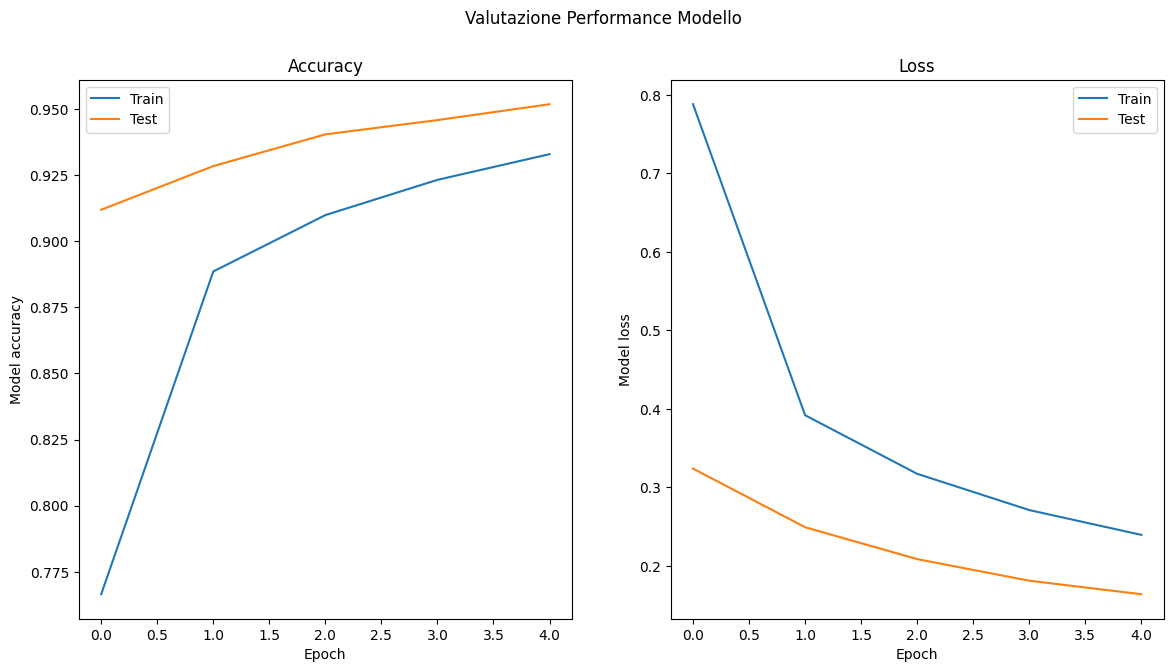

In [20]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
fig, ax = plt.subplots(1,2, figsize = (14, 7))

for i in range(0, 2):
    if i==0:
        # summarize history for accuracy
        ax[i].plot(history.history['acc'])
        ax[i].plot(history.history['val_acc'])
        ax[i].set_ylabel('Model accuracy')
        ax[i].set_title('Accuracy')

    else:
        # summarize history for loss
        ax[i].plot(history.history['loss'])
        ax[i].plot(history.history['val_loss'])
        ax[i].set_ylabel('Model loss')
        ax[i].set_title('Loss')

    ax[i].set_xlabel('Epoch')
    ax[i].legend(['Train', 'Test'], loc='best')

fig.suptitle("Valutazione Performance Modello")
plt.show()

313/313 [==============================] - 1s 4ms/step


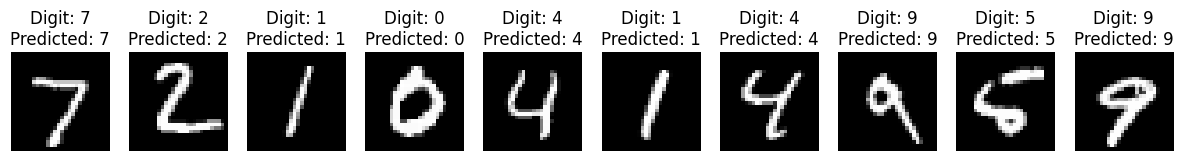

In [21]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

<span style="color: blue;">

## Esercizio 3

</span>

Dopo aver disegnato le cifre (vedi cartella immagini) utilizzo la CNN costruita al punto precedente:

In [22]:
from PIL import Image
import os

In [23]:
#Definisco un processo per creare le immagini
def riconosci_numero(nomfile):
    #Importo l'immagine del numero che voglio stampare
    digit_in = Image.open(nomfile).convert('L')
    #Immagazzino le dimensioni dell'immagine
    ydim, xdim = digit_in.size
    #Stampo dimensioni immagine
    print("Image size: "+str(xdim)+"x"+str(ydim))

    #Carico immagine e salvo in array
    pix=digit_in.load()
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255

    #Faccio reshape del contenitore e utilizzo CNN per fare la predizione
    X = data.reshape(1, 28, 28,1)
    pred_0 = model_CNN.predict(X)

    #Stampo l'immagine con associata la predizione
    plt.figure(figsize=(5, 5))  
    data = data.reshape(xdim,ydim)
    plt.imshow(data, cmap='gray')    
    plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
    plt.axis('off') 
    plt.show()

Image size: 28x28
1/1 [==============================] - 0s 26ms/step


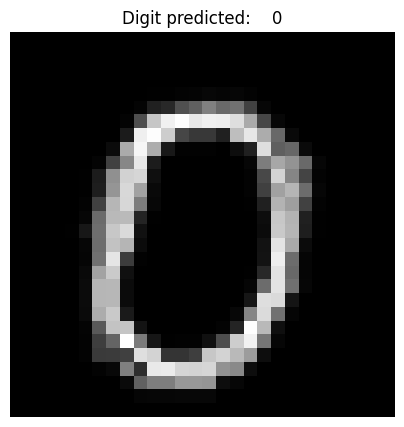

Image size: 28x28
1/1 [==============================] - 0s 19ms/step


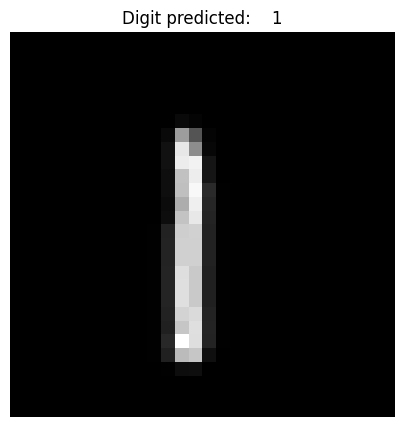

Image size: 28x28
1/1 [==============================] - 0s 19ms/step


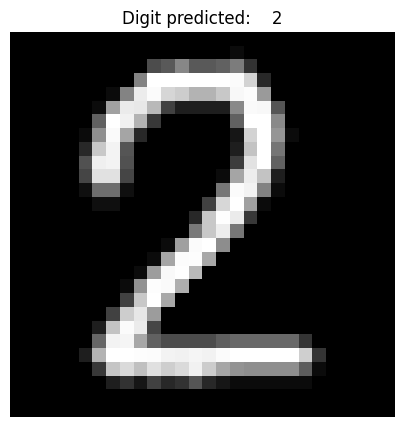

Image size: 28x28
1/1 [==============================] - 0s 18ms/step


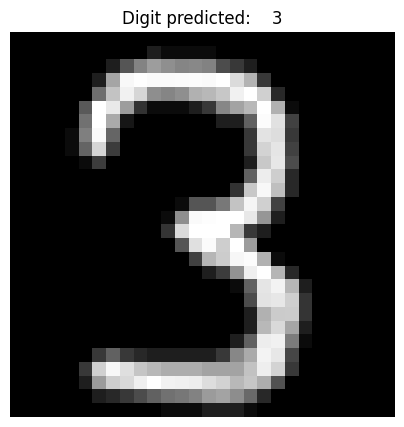

Image size: 28x28
1/1 [==============================] - 0s 20ms/step


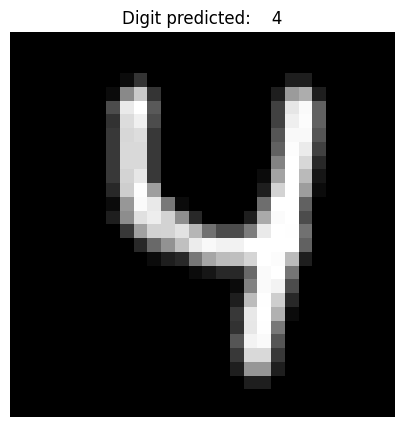

Image size: 28x28
1/1 [==============================] - 0s 19ms/step


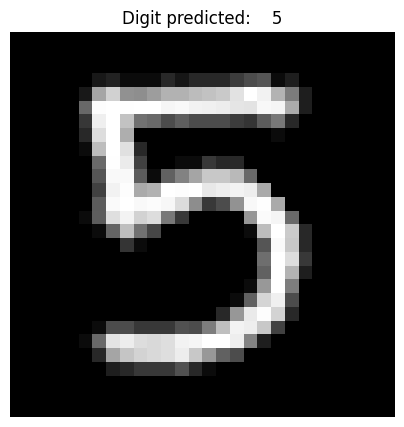

Image size: 28x28
1/1 [==============================] - 0s 18ms/step


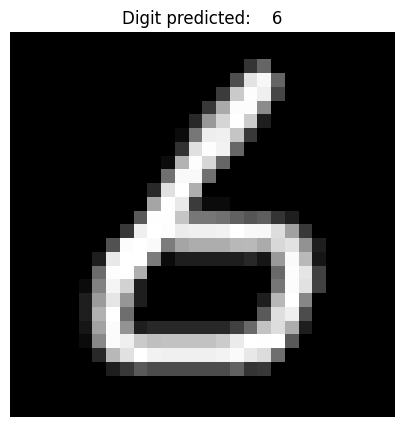

Image size: 28x28
1/1 [==============================] - 0s 19ms/step


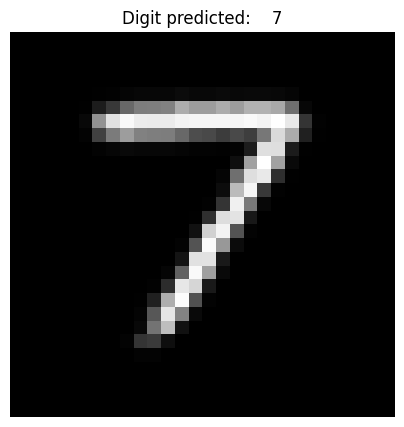

Image size: 28x28
1/1 [==============================] - 0s 20ms/step


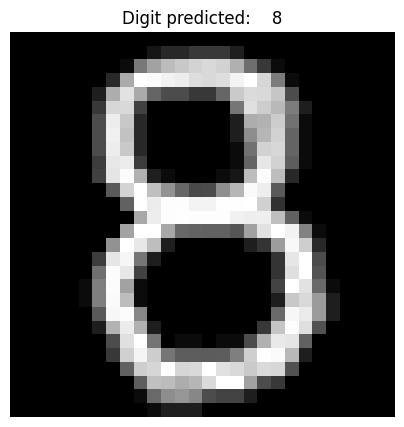

Image size: 28x28
1/1 [==============================] - 0s 18ms/step


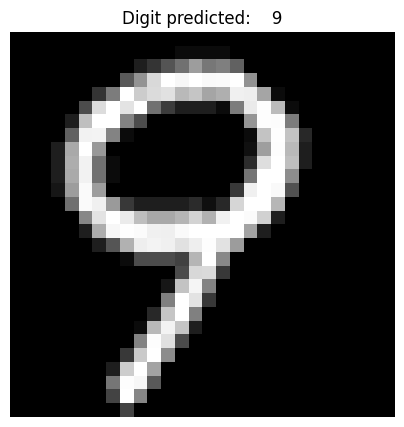

In [24]:
#Ciclo per ottenere le predizioni delle varie cifre
for i in range(0, 10):
    nome = "Immagini/Num{}.png".format(i)
    riconosci_numero(nome)